# Career Shifterz
Nama :
- Auviera Pascafiwi
- Fahmy Rafian S
- Fu’ad Saifuddin
- Indra Maulidin
- Luthfan Zulfahmi
- Wenvint

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import under_sampling, over_sampling

## Read Data

In [2]:
df = pd.read_csv('D:\Rakamyn DS Batch 23\Final Project\Loan Prediction\Training Data.csv')
df.sample(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
188531,188532,6410529,45,4,single,rented,no,Financial_Analyst,Morbi,Gujarat,4,14,0
94986,94987,2135764,35,19,single,rented,no,Flight_attendant,Gopalpur,West_Bengal,5,14,0
193055,193056,97034,34,4,single,rented,yes,Mechanical_engineer,Vijayanagaram,Andhra_Pradesh,4,11,0
4510,4511,7220808,71,1,single,rented,no,Financial_Analyst,Belgaum,Karnataka,1,10,0
90036,90037,5546336,35,11,single,rented,no,Architect,Ramagundam[27],Telangana,11,13,0


## Label Encoding

In [3]:
mapping_m_s = {
    'single' : 0,
    'married' : 1
}

mapping_car = {
    'no' : 0,
    'yes' :1
}

df['Married/Single'] = df['Married/Single'].map(mapping_m_s)
df['Car_Ownership'] = df['Car_Ownership'].map(mapping_car)

In [4]:
house_category = pd.get_dummies(df['House_Ownership'], prefix='house')

df = df.join(house_category)

In [5]:
df.sample(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,house_norent_noown,house_owned,house_rented
1196,1197,8001918,41,5,0,rented,0,Economist,Bulandshahr,Uttar_Pradesh,5,14,0,0,0,1
120469,120470,7532651,49,15,1,rented,0,Comedian,Kalyan-Dombivli,Maharashtra,9,12,0,0,0,1
64417,64418,6620363,45,10,0,rented,0,Scientist,Pudukkottai,Tamil_Nadu,10,12,0,0,0,1
31643,31644,5739138,62,3,0,rented,0,Computer_hardware_engineer,Bhatpara,West_Bengal,3,12,0,0,0,1
7723,7724,8982743,34,15,1,owned,1,Lawyer,Thrissur,Kerala,8,11,0,0,1,0


## Split Data Train dan Test

In [6]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag',
       'house_norent_noown', 'house_owned', 'house_rented'],
      dtype='object')

In [7]:
X = df.drop(columns = ['Id','House_Ownership','CURRENT_JOB_YRS','Profession','CITY','STATE','Risk_Flag'])
y = df['Risk_Flag']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

### Oversampling SMOTE

In [10]:
X_train_SMOTE, y_train_SMOTE = over_sampling.SMOTE().fit_resample(X_train,y_train)

## Modeling

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [12]:
from sklearn import metrics

In [13]:
models = {
    "RandomForest" : RandomForestClassifier(random_state=42),
    "KNeighbors" : KNeighborsClassifier(),
    "XGB" : XGBClassifier()
}

for model_name, clf in models.items() :
    clf.fit(X_train_SMOTE,y_train_SMOTE)
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:,1]
    
    print("Evaluate model: {}".format(model_name))
    
    accuracy_test = metrics.accuracy_score(y_test,y_pred)
    print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')
    precission_test = metrics.precision_score(y_test,y_pred,pos_label=1)
    print("Precission Test :" + str(round(precission_test*100,2)) + '%')
    recall_test = metrics.recall_score(y_test,y_pred,pos_label=1)
    print("Recall Test :" + str(round(recall_test*100,2)) + '%')
    f1_test = metrics.f1_score(y_test,y_pred,pos_label=1)
    print("F1 Test :" + str(round(f1_test*100,2)) + '%')
    fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba, pos_label=1)
    auc_test = metrics.auc(fpr_test, tpr_test)
    print("AUC Test : "+str(round(auc_test*100,2))+'%')
    print("\n")

Evaluate model: RandomForest
Accuracy Test :86.33%
Precission Test :46.86%
Recall Test :85.37%
F1 Test :60.51%
AUC Test : 93.46%


Evaluate model: KNeighbors
Accuracy Test :85.89%
Precission Test :44.28%
Recall Test :58.22%
F1 Test :50.31%
AUC Test : 87.21%


Evaluate model: XGB
Accuracy Test :80.55%
Precission Test :36.47%
Recall Test :79.01%
F1 Test :49.9%
AUC Test : 85.19%




__Kesimpulan__ :
- Berdasarkan Beberapa Model Algoritma yang telah diuji, Algoritma __Random Forest Classifier__ memiliki Score Performance cukup baik untuk setiap Metricsnya dibandingkan dengan Algoritma yang lain.
- Maka berdasarkan hasil uji coba tersebut, untuk proses selanjutnya akan digunakan Model Algoritma __Random Forest Classifier__.

In [14]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_SMOTE,y_train_SMOTE)

RandomForestClassifier(random_state=42)

In [15]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]
    
accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy :" + str(round(accuracy*100,2)) + '%')
precission = metrics.precision_score(y_test,y_pred,pos_label=1)
print("Precission :" + str(round(precission*100,2)) + '%')
recall = metrics.recall_score(y_test,y_pred,pos_label=1)
print("Recall :" + str(round(recall*100,2)) + '%')
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba, pos_label=1)
auc_test = metrics.auc(fpr, tpr)
print("AUC : "+str(round(auc_test*100,2))+'%')

Accuracy :86.33%
Precission :46.86%
Recall :85.37%
AUC : 93.46%


Text(0.5, 1.0, 'feature importance score')

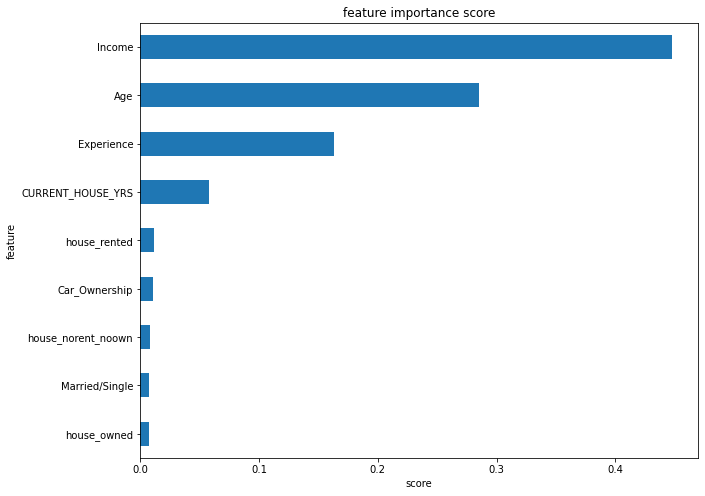

In [16]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

Log Performance

In [17]:
performance_log = pd.DataFrame(columns=["Experiment","Recall","Accuracy","Precission","AUC"])

perf = {
    "Experiment": "Initial Model (Random Forest)",
    "Recall": str(round(recall*100,2))+'%',
    "Accuracy": str(round(accuracy*100,2))+'%',
    "Precission": str(round(precission*100,2))+'%',
    "AUC" : str(round(auc_test*100,2))+'%'
}
performance_log = performance_log.append(perf, ignore_index=True)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_3424/965448917.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_log = performance_log.append(perf, ignore_index=True)


In [18]:
performance_log

,Experiment,Recall,Accuracy,Precission,AUC
0,Initial Model (Random Forest),85.37%,86.33%,46.86%,93.46%


## Model Evaluation : Pemilihan dan perhitungan Metrics

### Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix

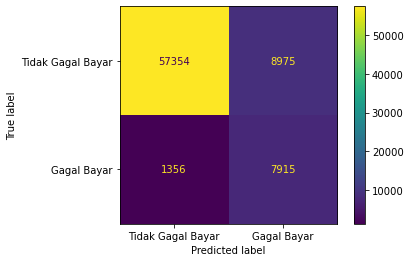

In [20]:
cm = confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Tidak Gagal Bayar','Gagal Bayar'])

cm_display.plot()
plt.show()

__Kesimpulan__:
- Berdasarkan data Confusion Matrix tersebut, data matrix didominasi oleh True Negative. Hal Tersebut dapat disebabkan karena Imbalance Label pada dataset yang didominasi oleh Label Negatif (Risk_Flag = 0).
- Pada pemodelan ini kami Fokus ke data __False Negative__, hal tersebut dikarenakan :
    - __False Negative__ mengartikan bahwa __Pelanggan yang seharusnya Gagal Bayar tetapi oleh Model diprediksi Tidak Gagal Bayar__.
    - Jika nilai __Nila False Negative terlalu besar__, perusahaan akan mengalami beberapa kerugian seperti :
        - Bank dapat mengalami Profit Loss karena Model gagal memprediksi Pelanggan yang Gagal Bayar.
        - Tim Kredit Bank dapat mengalami penurunan performa.
- Maka pada Pemodelan ini akan menggunakan Metric __Recall__ dalam melakukan evaluasi model.

## Model Evaluation : Apakah model sudah best-fit?

### Melihat Score Train dan Score Test

In [21]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_SMOTE,y_train_SMOTE)

RandomForestClassifier(random_state=42)

In [22]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]
y_pred_train = rf.predict(X_train_SMOTE)
y_pred_proba_train = rf.predict_proba(X_train_SMOTE)[:,1]
    
accuracy_test = metrics.accuracy_score(y_test,y_pred)
print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')
accuracy_train = metrics.accuracy_score(y_train_SMOTE,y_pred_train)
print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
    
precission_test = metrics.precision_score(y_test,y_pred,pos_label=1)
print("Precission Test :" + str(round(precission_test*100,2)) + '%')
precission_train = metrics.precision_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Precission Train:" + str(round(precission_train*100,2)) + '%')

recall_test = metrics.recall_score(y_test,y_pred,pos_label=1)
print("Recall Test :" + str(round(recall_test*100,2)) + '%')
recall_train = metrics.recall_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Recall Train :" + str(round(recall_train*100,2)) + '%')

f1_test = metrics.f1_score(y_test,y_pred,pos_label=1)
print("F1 Test :" + str(round(f1_test*100,2)) + '%')
f1_train = metrics.f1_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("F1 Train :" + str(round(f1_train*100,2)) + '%')

fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)
print("AUC Test : "+str(round(auc_test*100,2))+'%')
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_SMOTE, y_pred_proba_train, pos_label=1)
auc_train = metrics.auc(fpr_train, tpr_train)
print("AUC Train : "+str(round(auc_train*100,2))+'%')
print("\n")

Accuracy Test :86.33%
Accuracy Train :95.8%
Precission Test :46.86%
Precission Train:92.27%
Recall Test :85.37%
Recall Train :99.99%
F1 Test :60.51%
F1 Train :95.97%
AUC Test : 93.46%
AUC Train : 97.22%




__Kesimpulan__ :
- Terlihat __Score Train > Score Test__ untuk Metric Recall, maka Model masih termasuk __Overfitting__.
- Untuk mengatasi Overfitting tersebut perlu dilakukan __Hyperparameter Tuning__.

## Hyper-Paramater Tuning

### Hyper-Parameter Tuning dengan RandomizedSearch

In [23]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [24]:
hyperparams = dict(
                        n_estimators = [int(x) for x in np.linspace(10,100,20)],
                        min_samples_split = [int(x) for x in np.linspace(2,30,15)],
                        min_samples_leaf = [int(x) for x in np.linspace(2,30,11)],
                        max_depth = [int(x) for x in np.linspace(2,100,15)]   
                    )

In [25]:
rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparams, scoring='recall', random_state=42, cv=5)
rs.fit(X_train_SMOTE,y_train_SMOTE)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [2, 9, 16, 23, 30, 37, 44,
                                                      51, 58, 65, 72, 79, 86,
                                                      93, 100],
                                        'min_samples_leaf': [2, 4, 7, 10, 13,
                                                             16, 18, 21, 24, 27,
                                                             30],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18,
                                                              20, 22, 24, 26,
                                                              28, 30],
                                        'n_estimators': [10, 14, 19, 24, 28, 33,
                                                         38, 43, 47, 52, 57, 62,
                                                         66, 71, 76, 81, 85, 90,
                                                         95, 100]},
                   random_state=42, scoring='recall')

In [27]:
y_pred = rs.predict(X_test)
y_pred_proba = rs.predict_proba(X_test)[:,1]
y_pred_train = rs.predict(X_train_SMOTE)
y_pred_proba_train = rs.predict_proba(X_train_SMOTE)[:,1]
    
accuracy_test = metrics.accuracy_score(y_test,y_pred)
print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')
accuracy_train = metrics.accuracy_score(y_train_SMOTE,y_pred_train)
print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
    
precission_test = metrics.precision_score(y_test,y_pred,pos_label=1)
print("Precission Test :" + str(round(precission_test*100,2)) + '%')
precission_train = metrics.precision_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Precission Train:" + str(round(precission_train*100,2)) + '%')

recall_test = metrics.recall_score(y_test,y_pred,pos_label=1)
print("Recall Test :" + str(round(recall_test*100,2)) + '%')
recall_train = metrics.recall_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Recall Train :" + str(round(recall_train*100,2)) + '%')

f1_test = metrics.f1_score(y_test,y_pred,pos_label=1)
print("F1 Test :" + str(round(f1_test*100,2)) + '%')
f1_train = metrics.f1_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("F1 Train :" + str(round(f1_train*100,2)) + '%')

fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)
print("AUC Test : "+str(round(auc_test*100,2))+'%')
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_SMOTE, y_pred_proba_train, pos_label=1)
auc_train = metrics.auc(fpr_train, tpr_train)
print("AUC Train : "+str(round(auc_train*100,2))+'%')

Accuracy Test :86.76%
Accuracy Train :92.8%
Precission Test :47.73%
Precission Train:89.79%
Recall Test :84.01%
Recall Train :96.58%
F1 Test :60.88%
F1 Train :93.06%
AUC Test : 93.44%
AUC Train : 96.17%


In [28]:
for key, value in hyperparams.items() :
        print(key+':', rs.best_estimator_.get_params()[key])

n_estimators: 57
min_samples_split: 6
min_samples_leaf: 4
max_depth: 37


Log Perfromance

In [29]:
perf = {
    "Experiment": "Hyperparameters Tuning using Randomized Search",
    "Recall": str(round(recall_test*100,2))+'%',
    "Accuracy": str(round(accuracy_test*100,2))+'%',
    "Precission": str(round(precission_test*100,2))+'%',
    "AUC" : str(round(auc_test*100,2))+'%'
}
performance_log = performance_log.append(perf, ignore_index=True)

performance_log

C:\Users\ASUS\AppData\Local\Temp/ipykernel_3424/315885886.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_log = performance_log.append(perf, ignore_index=True)


,Experiment,Recall,Accuracy,Precission,AUC
0,Initial Model (Random Forest),85.37%,86.33%,46.86%,93.46%
1,Hyperparameters Tuning using Randomized Search,84.01%,86.76%,47.73%,93.44%


### Find The Best Parameters

#### Mencari Parameter n_estimators

param value: 10; train: 0.9954097300791983; test: 0.8469420774457987
param value: 12; train: 0.996909649264587; test: 0.8498543846402762
param value: 14; train: 0.9973363504121545; test: 0.8475892568223493
param value: 16; train: 0.9983255212542428; test: 0.8506094272462518
param value: 18; train: 0.9983319864231454; test: 0.8499622478697012
param value: 20; train: 0.9987198965572975; test: 0.8511487433933772
param value: 22; train: 0.9987198965572975; test: 0.8499622478697012
param value: 24; train: 0.9991401325359625; test: 0.8505015640168266
param value: 26; train: 0.9993146920963311; test: 0.8529824182936037
param value: 28; train: 0.9992952965896233; test: 0.8524431021464782
param value: 31; train: 0.9995021819945046; test: 0.8540610505878546
param value: 33; train: 0.9996056246969452; test: 0.8552475461115305
param value: 35; train: 0.9993017617585259; test: 0.855678999029231
param value: 37; train: 0.9997090673993858; test: 0.8552475461115305
param value: 39; train: 0.9997995797

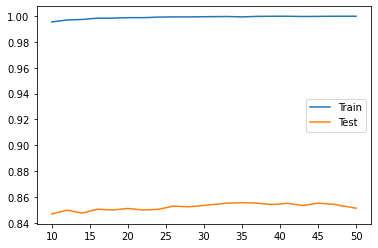

In [30]:
param_values = [int(x) for x in np.linspace(10,50,20)]
train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=c)
    model.fit(X_train_SMOTE, y_train_SMOTE)

    # eval on train
    y_pred_train = model.predict(X_train_SMOTE)
    train_rec = metrics.recall_score(y_train_SMOTE, y_pred_train,pos_label=1)
    train_scores.append(train_rec)

    # eval on test
    y_pred = model.predict(X_test)
    test_rec = metrics.recall_score(y_test, y_pred,pos_label=1)
    test_scores.append(test_rec)

    print('param value: ' + str(c) + '; train: ' + str(train_rec) + '; test: '+ str(test_rec))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

#### Mencari Parameter min_samples_split

param value: 2; train: 0.9995991595280427; test: 0.8543846402761298
param value: 4; train: 0.9966381121706804; test: 0.8530902815230288
param value: 6; train: 0.9946339098108938; test: 0.8563261784057815
param value: 8; train: 0.9936447389688056; test: 0.8579441268471578
param value: 10; train: 0.9931339906255051; test: 0.8602092546650847
param value: 12; train: 0.99268789397123; test: 0.856865494552907
param value: 14; train: 0.9921383546145143; test: 0.8594542120591091
param value: 16; train: 0.9901276870858251; test: 0.8560025887175062
param value: 18; train: 0.9868498464522386; test: 0.8519037859993528
param value: 20; train: 0.9817876192015517; test: 0.8476971200517743
param value: 22; train: 0.9767447874575723; test: 0.8459713083809729
param value: 24; train: 0.9716825602068854; test: 0.8410095998274189
param value: 26; train: 0.967648294811702; test: 0.8376658397152411
param value: 28; train: 0.9645708744140941; test: 0.8385287455506418
param value: 30; train: 0.9615322450299014

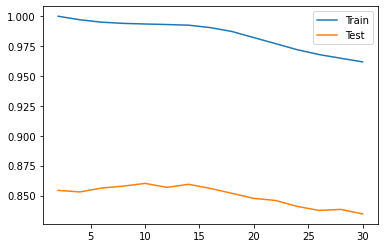

In [31]:
param_values = [int(x) for x in np.linspace(2,30,15)]
train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=31,min_samples_split=c)
    model.fit(X_train_SMOTE, y_train_SMOTE)

    # eval on train
    y_pred_train = model.predict(X_train_SMOTE)
    train_rec = metrics.recall_score(y_train_SMOTE, y_pred_train,pos_label=1)
    train_scores.append(train_rec)

    # eval on test
    y_pred = model.predict(X_test)
    test_rec = metrics.recall_score(y_test, y_pred,pos_label=1)
    test_scores.append(test_rec)

    print('param value: ' + str(c) + '; train: ' + str(train_rec) + '; test: '+ str(test_rec))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

#### Mencari Parameter min_samples_leaf

param value: 2; train: 0.9573234200743495; test: 0.832704131161687
param value: 4; train: 0.9487118150961694; test: 0.8318412253262862
param value: 7; train: 0.9385614999191854; test: 0.8287131916729586
param value: 10; train: 0.9309261354452885; test: 0.8261244741667566
param value: 13; train: 0.9231550024244384; test: 0.8234278934311293
param value: 16; train: 0.915610150315177; test: 0.8187897745658504
param value: 18; train: 0.9105285275577825; test: 0.8173875525833243
param value: 21; train: 0.9020268304509456; test: 0.8140437924711466
param value: 24; train: 0.896705996444157; test: 0.8118865278826448
param value: 27; train: 0.8924001939550671; test: 0.8049832811994391
param value: 30; train: 0.8919799579764022; test: 0.8071405457879409


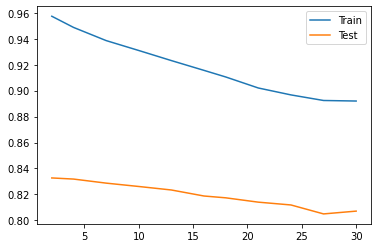

In [32]:
param_values = [int(x) for x in np.linspace(2,30,11)]
train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=31,min_samples_split=28,min_samples_leaf=c)
    model.fit(X_train_SMOTE, y_train_SMOTE)

    # eval on train
    y_pred_train = model.predict(X_train_SMOTE)
    train_rec = metrics.recall_score(y_train_SMOTE, y_pred_train,pos_label=1)
    train_scores.append(train_rec)

    # eval on test
    y_pred = model.predict(X_test)
    test_rec = metrics.recall_score(y_test, y_pred,pos_label=1)
    test_scores.append(test_rec)

    print('param value: ' + str(c) + '; train: ' + str(train_rec) + '; test: '+ str(test_rec))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

#### Mencari Parameter max_depth

param value: 10; train: 0.7931598513011152; test: 0.7052097939812318
param value: 12; train: 0.8395991595280426; test: 0.7507280767986193
param value: 15; train: 0.8980119605624697; test: 0.8078955883939165
param value: 18; train: 0.9020720866332633; test: 0.8178190055010247
param value: 21; train: 0.8983093583319864; test: 0.8143673821594218
param value: 24; train: 0.8956004525618232; test: 0.8118865278826448
param value: 27; train: 0.8971133020850169; test: 0.8083270413116169
param value: 30; train: 0.8973201874898982; test: 0.8094056736058678
param value: 32; train: 0.8960659447228059; test: 0.8099449897529932
param value: 35; train: 0.8963827379990302; test: 0.8095135368352928
param value: 38; train: 0.896091805398416; test: 0.812102254341495
param value: 41; train: 0.8962405042831744; test: 0.8122101175709201
param value: 44; train: 0.8965572975593987; test: 0.8100528529824182
param value: 47; train: 0.896078875060611; test: 0.8102685794412685
param value: 50; train: 0.89657669306

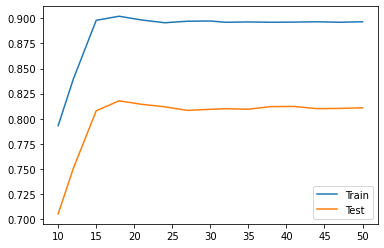

In [33]:
param_values = [int(x) for x in np.linspace(10,50,15)]
train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=31,min_samples_split=28,min_samples_leaf=24,max_depth=c)
    model.fit(X_train_SMOTE, y_train_SMOTE)

    # eval on train
    y_pred_train = model.predict(X_train_SMOTE)
    train_rec = metrics.recall_score(y_train_SMOTE, y_pred_train,pos_label=1)
    train_scores.append(train_rec)

    # eval on test
    y_pred = model.predict(X_test)
    test_rec = metrics.recall_score(y_test, y_pred,pos_label=1)
    test_scores.append(test_rec)

    print('param value: ' + str(c) + '; train: ' + str(train_rec) + '; test: '+ str(test_rec))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

#### Mencari Parameter criterion

param value: gini; train: 0.8966672054307419; test: 0.8131808866357458
param value: entropy; train: 0.8961176660740262; test: 0.8133966130945961


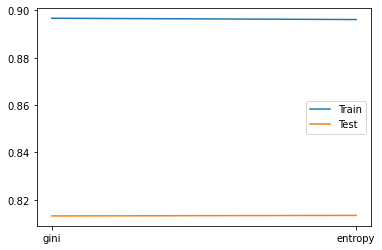

In [35]:
param_values = ['gini','entropy']
train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=31,min_samples_split=28,min_samples_leaf=24,max_depth=24,criterion=c)
    model.fit(X_train_SMOTE, y_train_SMOTE)

    # eval on train
    y_pred_train = model.predict(X_train_SMOTE)
    train_rec = metrics.recall_score(y_train_SMOTE, y_pred_train,pos_label=1)
    train_scores.append(train_rec)

    # eval on test
    y_pred = model.predict(X_test)
    test_rec = metrics.recall_score(y_test, y_pred,pos_label=1)
    test_scores.append(test_rec)

    print('param value: ' + str(c) + '; train: ' + str(train_rec) + '; test: '+ str(test_rec))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


param value: auto; train: 0.8975852594149022; test: 0.8128572969474706
param value: sqrt; train: 0.8968676256667205; test: 0.8126415704886204
param value: log2; train: 0.8962663649587845; test: 0.813288749865171


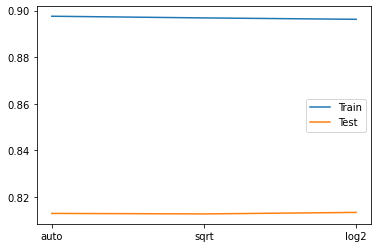

In [37]:
param_values = ['auto', 'sqrt', 'log2']
train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=31,min_samples_split=28,min_samples_leaf=24,max_depth=24,criterion='gini',
                                   max_features=c)
    model.fit(X_train_SMOTE, y_train_SMOTE)

    # eval on train
    y_pred_train = model.predict(X_train_SMOTE)
    train_rec = metrics.recall_score(y_train_SMOTE, y_pred_train,pos_label=1)
    train_scores.append(train_rec)

    # eval on test
    y_pred = model.predict(X_test)
    test_rec = metrics.recall_score(y_test, y_pred,pos_label=1)
    test_scores.append(test_rec)

    print('param value: ' + str(c) + '; train: ' + str(train_rec) + '; test: '+ str(test_rec))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

In [38]:
rf = RandomForestClassifier(n_estimators=31,min_samples_split=28,min_samples_leaf=24,max_depth=24,criterion='gini',
                            max_features='sqrt',random_state=42)
rf.fit(X_train_SMOTE,y_train_SMOTE)

RandomForestClassifier(max_depth=24, min_samples_leaf=24, min_samples_split=28,
                       n_estimators=31, random_state=42)

In [39]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]
y_pred_train = rf.predict(X_train_SMOTE)
y_pred_proba_train = rf.predict_proba(X_train_SMOTE)[:,1]
    
accuracy_test = metrics.accuracy_score(y_test,y_pred)
print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')
accuracy_train = metrics.accuracy_score(y_train_SMOTE,y_pred_train)
print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
    
precission_test = metrics.precision_score(y_test,y_pred,pos_label=1)
print("Precission Test :" + str(round(precission_test*100,2)) + '%')
precission_train = metrics.precision_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Precission Train:" + str(round(precission_train*100,2)) + '%')

recall_test = metrics.recall_score(y_test,y_pred,pos_label=1)
print("Recall Test :" + str(round(recall_test*100,2)) + '%')
recall_train = metrics.recall_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Recall Train :" + str(round(recall_train*100,2)) + '%')

f1_test = metrics.f1_score(y_test,y_pred,pos_label=1)
print("F1 Test :" + str(round(f1_test*100,2)) + '%')
f1_train = metrics.f1_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("F1 Train :" + str(round(f1_train*100,2)) + '%')

fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)
print("AUC Test : "+str(round(auc_test*100,2))+'%')
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_SMOTE, y_pred_proba_train, pos_label=1)
auc_train = metrics.auc(fpr_train, tpr_train)
print("AUC Train : "+str(round(auc_train*100,2))+'%')
print("\n")

Accuracy Test :87.55%
Accuracy Train :89.43%
Precission Test :49.54%
Precission Train:89.22%
Recall Test :81.2%
Recall Train :89.71%
F1 Test :61.54%
F1 Train :89.46%
AUC Test : 89.92%
AUC Train : 94.54%




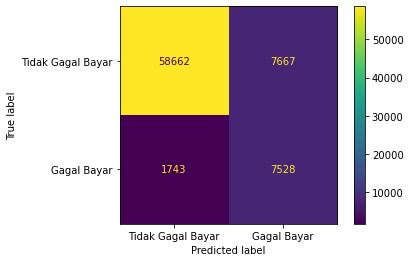

In [40]:
cm = confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Tidak Gagal Bayar','Gagal Bayar'])

cm_display.plot()
plt.show()

In [41]:
perf = {
    "Experiment": "Find the best parameters",
    "Recall": str(round(recall_test*100,2))+'%',
    "Accuracy": str(round(accuracy_test*100,2))+'%',
    "Precission": str(round(precission_test*100,2))+'%',
    "AUC" : str(round(auc_test*100,2))+'%'
}
performance_log = performance_log.append(perf, ignore_index=True)

performance_log

C:\Users\ASUS\AppData\Local\Temp/ipykernel_3424/3423303514.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_log = performance_log.append(perf, ignore_index=True)


,Experiment,Recall,Accuracy,Precission,AUC
0,Initial Model (Random Forest),85.37%,86.33%,46.86%,93.46%
1,Hyperparameters Tuning using Randomized Search,84.01%,86.76%,47.73%,93.44%
2,Find the best parameters,81.2%,87.55%,49.54%,89.92%


Text(0.5, 1.0, 'feature importance score')

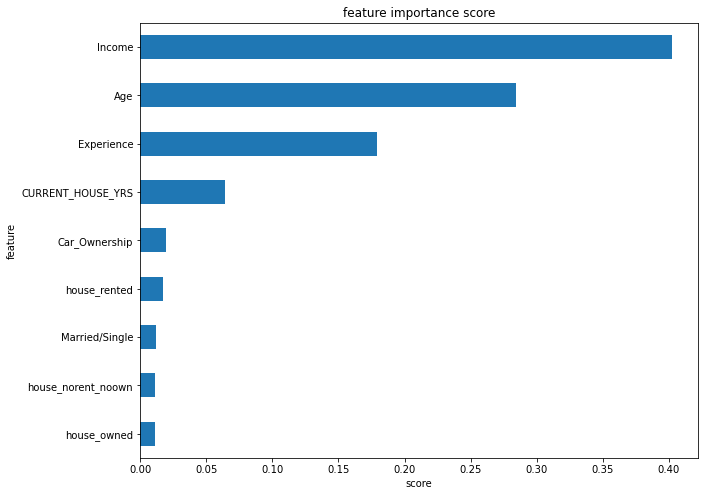

In [42]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [43]:
X_train_SMOTE = X_train_SMOTE.drop(columns = ['house_rented','Car_Ownership','Married/Single',
                                              'house_norent_noown','house_owned'])

X_test = X_test.drop(columns = ['house_rented','Car_Ownership','Married/Single',
                                'house_norent_noown','house_owned'])

In [44]:
rf = RandomForestClassifier(n_estimators=31,min_samples_split=28,min_samples_leaf=24,max_depth=24,criterion='gini',
                            max_features='sqrt',random_state=42)
rf.fit(X_train_SMOTE,y_train_SMOTE)

RandomForestClassifier(max_depth=24, min_samples_leaf=24, min_samples_split=28,
                       n_estimators=31, random_state=42)

In [45]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]
y_pred_train = rf.predict(X_train_SMOTE)
y_pred_proba_train = rf.predict_proba(X_train_SMOTE)[:,1]
    
accuracy_test = metrics.accuracy_score(y_test,y_pred)
print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')
accuracy_train = metrics.accuracy_score(y_train_SMOTE,y_pred_train)
print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
    
precission_test = metrics.precision_score(y_test,y_pred,pos_label=1)
print("Precission Test :" + str(round(precission_test*100,2)) + '%')
precission_train = metrics.precision_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Precission Train:" + str(round(precission_train*100,2)) + '%')

recall_test = metrics.recall_score(y_test,y_pred,pos_label=1)
print("Recall Test :" + str(round(recall_test*100,2)) + '%')
recall_train = metrics.recall_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Recall Train :" + str(round(recall_train*100,2)) + '%')

f1_test = metrics.f1_score(y_test,y_pred,pos_label=1)
print("F1 Test :" + str(round(f1_test*100,2)) + '%')
f1_train = metrics.f1_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("F1 Train :" + str(round(f1_train*100,2)) + '%')

fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)
print("AUC Test : "+str(round(auc_test*100,2))+'%')
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_SMOTE, y_pred_proba_train, pos_label=1)
auc_train = metrics.auc(fpr_train, tpr_train)
print("AUC Train : "+str(round(auc_train*100,2))+'%')
print("\n")

Accuracy Test :87.34%
Accuracy Train :88.19%
Precission Test :49.02%
Precission Train:88.87%
Recall Test :81.5%
Recall Train :87.33%
F1 Test :61.22%
F1 Train :88.09%
AUC Test : 90.57%
AUC Train : 94.22%




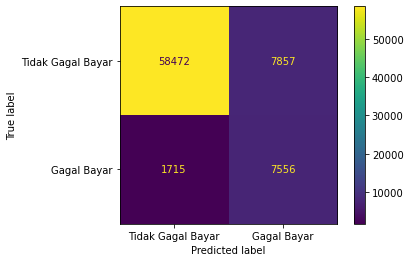

In [46]:
cm = confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Tidak Gagal Bayar','Gagal Bayar'])

cm_display.plot()
plt.show()